In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv('LOAN.csv')
df = df.iloc[:,1:]
df=df.dropna(axis=0)

def depen(x):
    if x == '3+':
        return 3
    else:
        return int(x)

df['Dependents']=df['Dependents'].apply(depen)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Married']= label_encoder.fit_transform(df['Married'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area']= label_encoder.fit_transform(df['Property_Area'])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,Y
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,Y
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,Y
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,Y


In [10]:
from sklearn.model_selection import train_test_split

X = np.array(df.iloc[:,:11])
Y = np.array(df.iloc[:,11])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [11]:
from sklearn.naive_bayes import GaussianNB  

In [12]:
classifier = GaussianNB()  
classifier.fit(X_train, Y_train)

GaussianNB()

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
Y_pred = classifier.predict(X_test)  
print(Y_pred)


['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N']


In [15]:
def acc(a,b):
    crt=0
    tot = len(a)
    for i,j in zip(a,b):
        if i==j:
            crt=+1
    return crt/tot*100

In [16]:
print(f'Accuracy : {acc(Y_test,Y_pred)*100 :.2f} %')

Accuracy : 83.33 %


In [17]:
import seaborn as sns

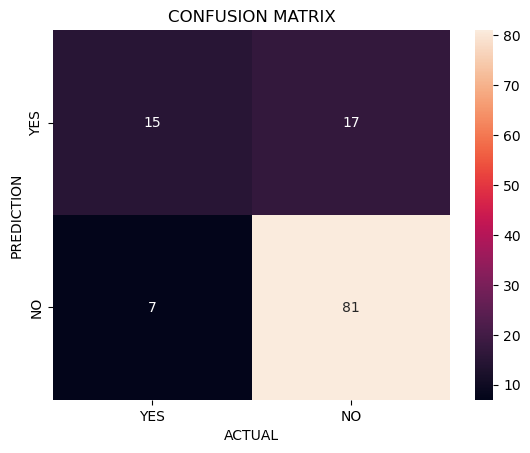

In [18]:
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['YES','NO'],yticklabels=['YES','NO'])
plt.ylabel("PREDICTION")
plt.xlabel("ACTUAL")
plt.title("CONFUSION MATRIX")
plt.show()